# <center> Teste Técnico </center>
### <center> José de Faria Leite Neto </center>
<br>

###### <li> O objetivo dessa apresentação é mostrar análises e insights sobre um problema de churns, apontando causas e possíveis caminhos para melhorarmos essa métrica. 

## <center> Bibliotecas e Funções </center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
def balance_dataset(data, target_column):
    class_counts = data[target_column].value_counts()

    majority_class_size = class_counts.max()

    balanced_samples = []
    for class_label, count in class_counts.items():
        class_samples = data[data[target_column] == class_label]
        if count < majority_class_size:
            oversampled_samples = class_samples.sample(majority_class_size, replace=True)
            balanced_samples.append(oversampled_samples)
        else:
            balanced_samples.append(class_samples)

    balanced_data = pd.concat(balanced_samples)

    return balanced_data

def plot_categorical(df, feature, label):
    df_group = df.groupby(feature)[label].sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data = df_group, x = feature, y = label)
    plt.ylabel("")
    plt.title(f"Quantidade de churns por {feature}")
    plt.show()
    
    
def plot_continuous(df, feature, label):
    df_cont = df.copy()
    df_cont['cut'] = pd.qcut(df_cont[feature], 5)
    df_group = df_cont.groupby('cut')[label].sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data = df_group, x = 'cut', y = label)
    plt.xlabel(feature)
    plt.ylabel("")
    plt.title(f"Quantidade de churns por {feature}")
    plt.show()

## <center> Tratamento dos dados </center>

In [3]:
df = pd.read_csv("Customer-Churn - Customer-Churn.csv")
print(df.shape)
df

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,"18,7","1005,7",No
7039,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,"18,7","383,65",No
7040,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),"18,55",689,No
7041,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),"18,4","1057,85",No


In [4]:
label = 'Churn'
df[label].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
df[label].describe().reset_index().rename(columns = {'index': ''})

,,Churn
0,count,7043
1,unique,2
2,top,No
3,freq,5174


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,"18,7","1005,7",No
7039,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,"18,7","383,65",No
7040,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),"18,55",689,No
7041,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),"18,4","1057,85",No


In [9]:
df = df.set_index('customerID')

In [10]:
df['tenure'] = df['tenure'].astype(int)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace(',', '.').astype(float)
df['TotalCharges'] = df['TotalCharges'].str.replace(',', '.').astype(float)
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,0
8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,0
5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,0
5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,0
8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.70,1005.70,0
9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,18.70,383.65,0
0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689.00,0


# <center> EDA </center>

In [11]:
discrete_variables = df.select_dtypes(include=['object']).columns
continuous_variables = df.select_dtypes(include=['float', 'int']).columns

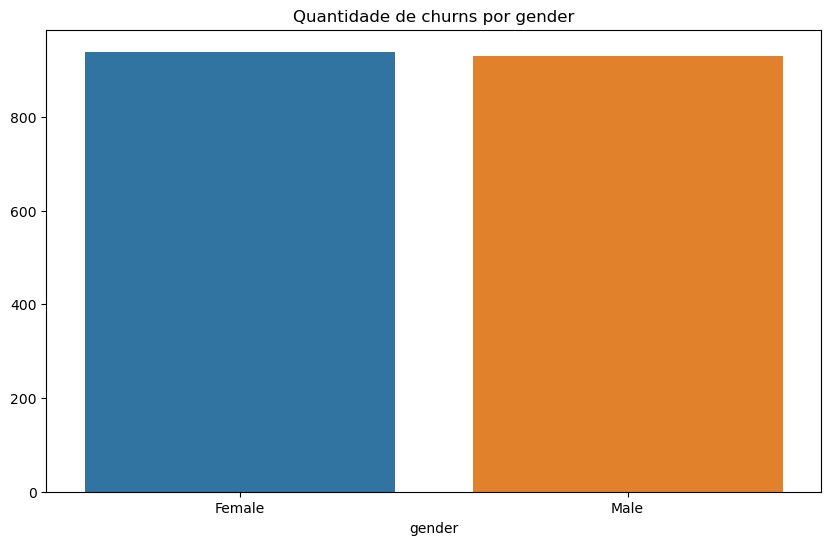

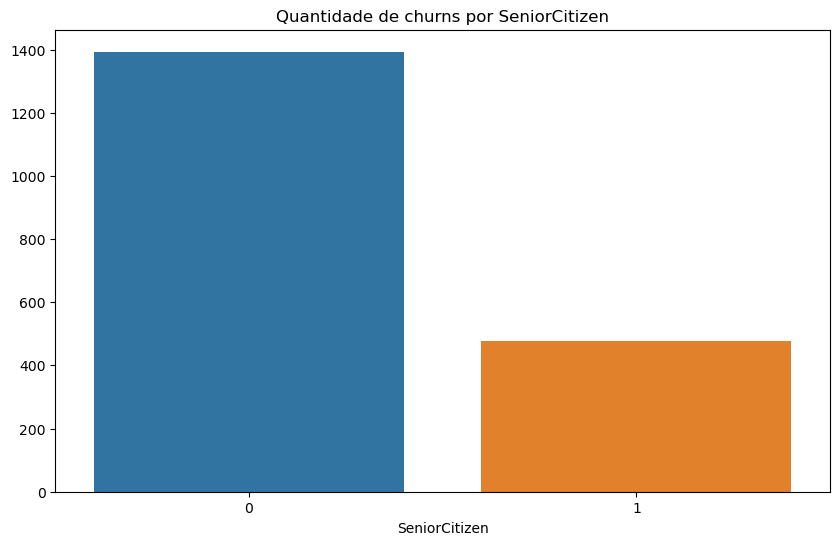

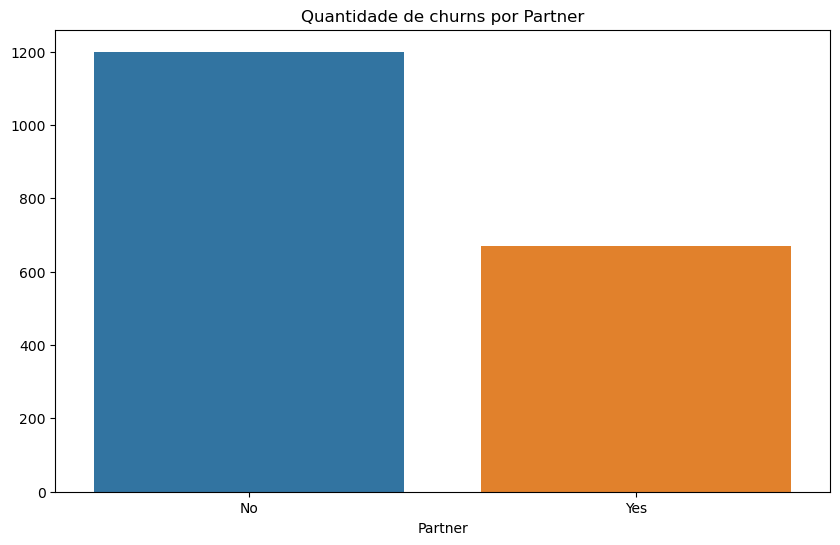

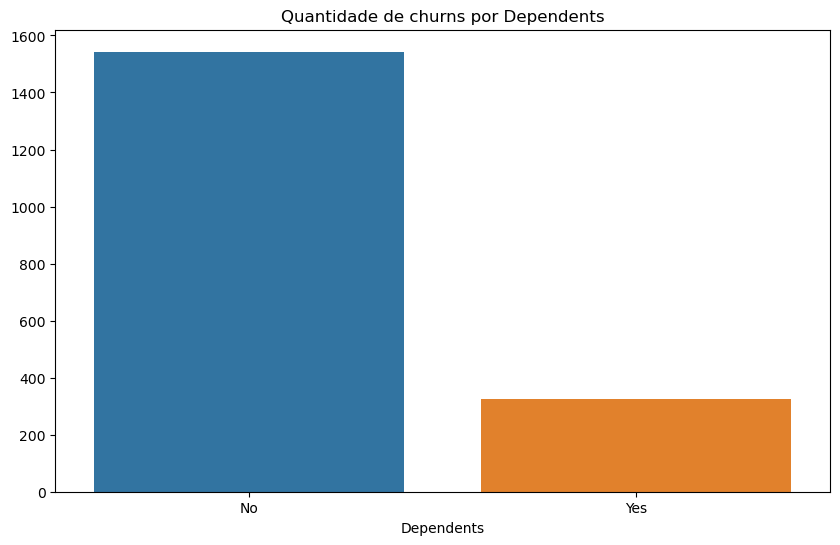

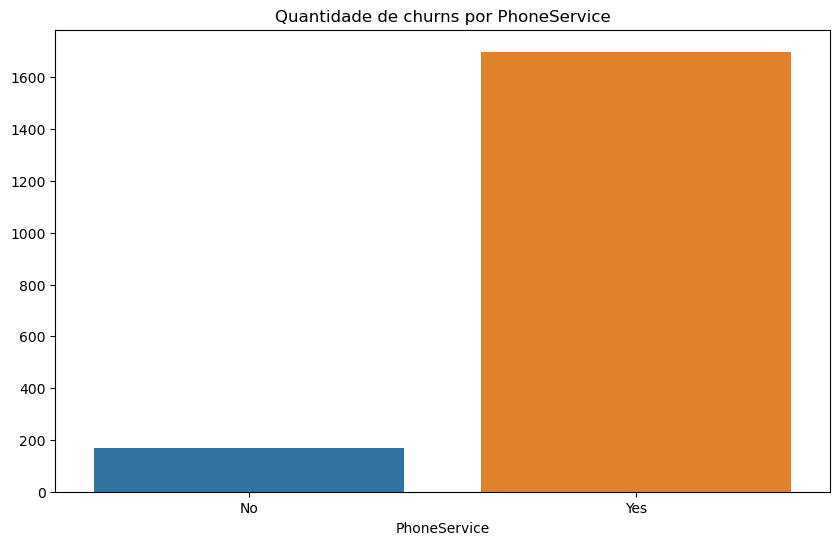

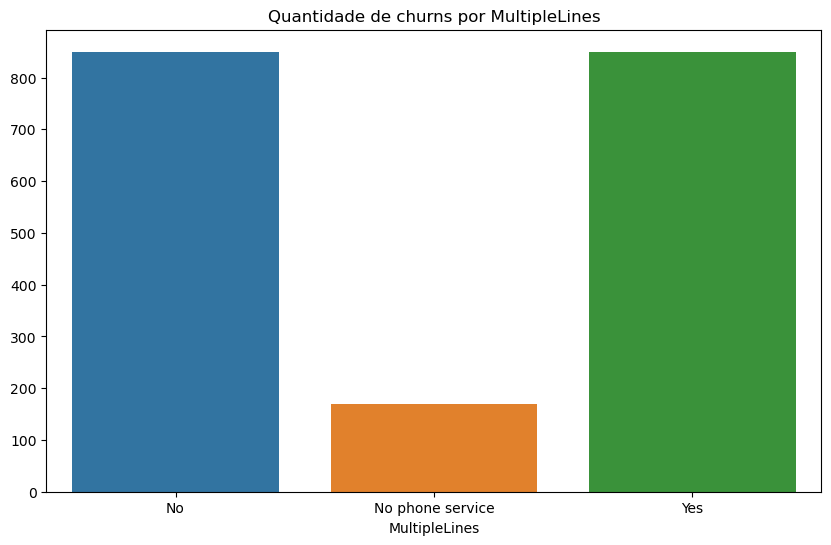

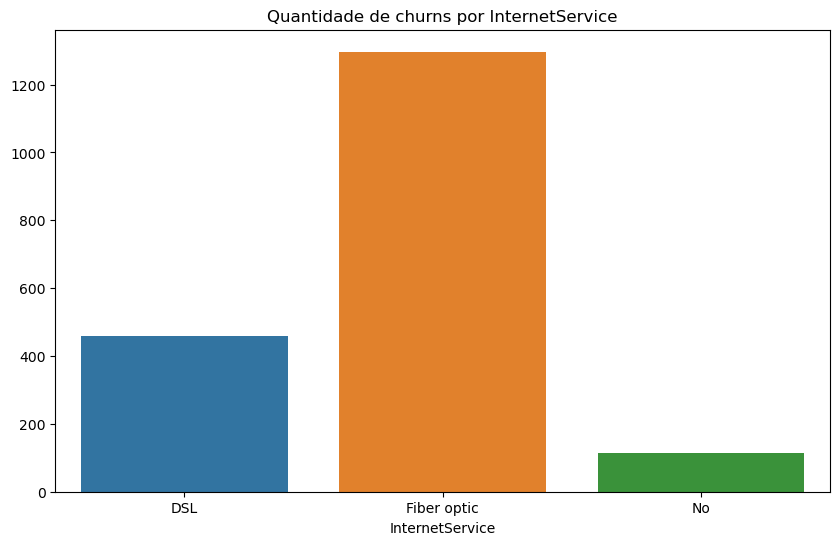

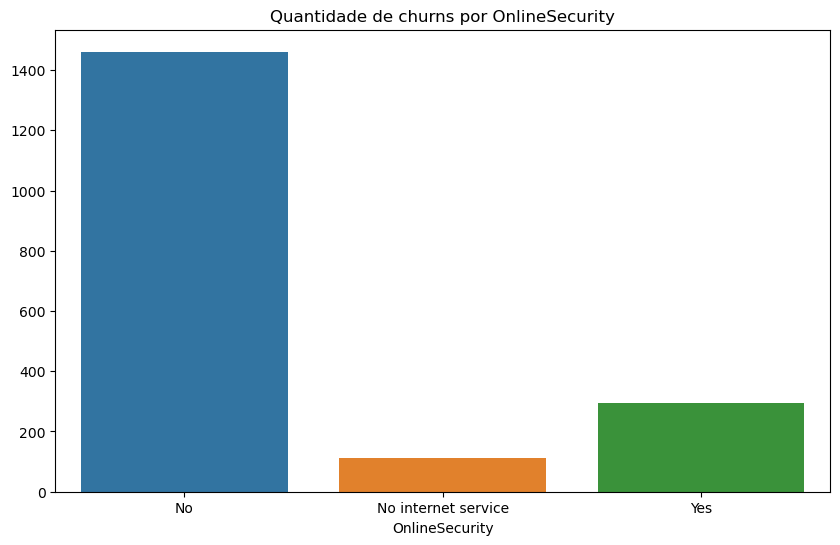

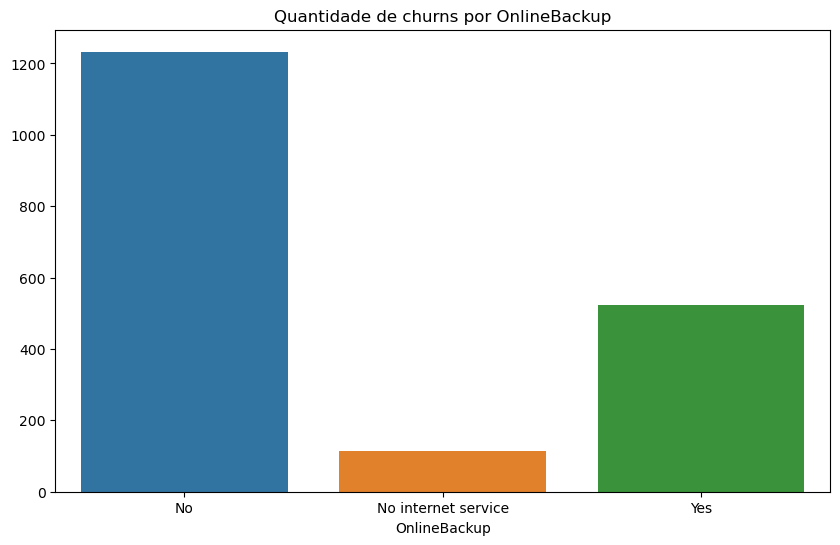

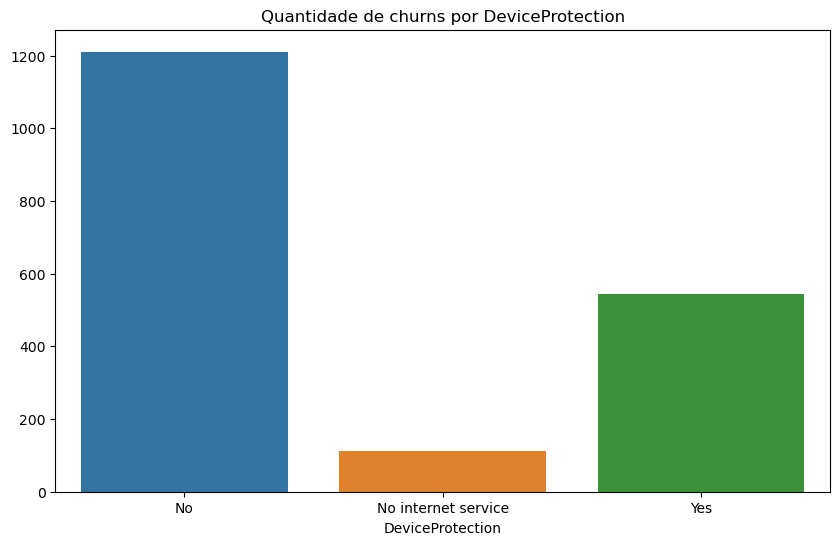

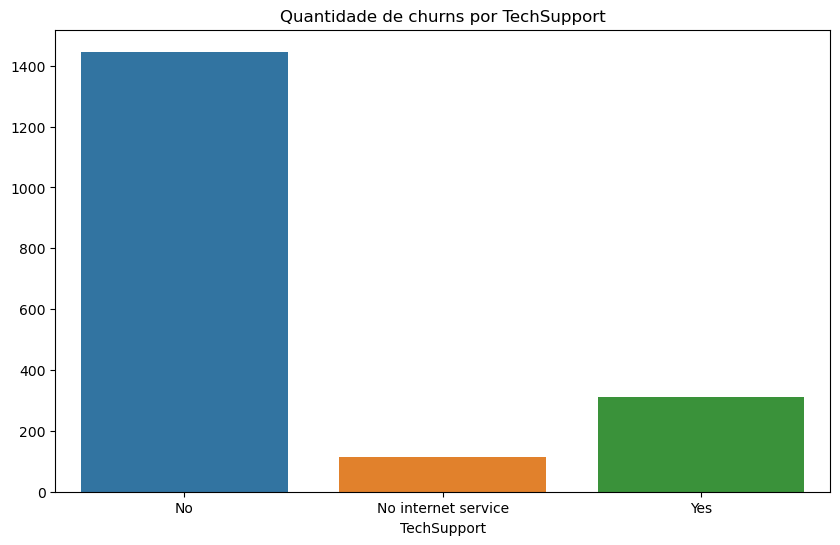

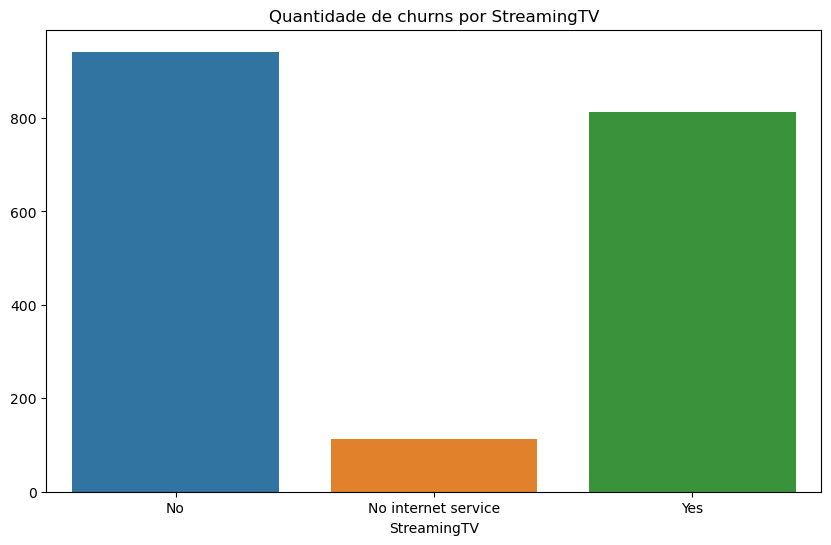

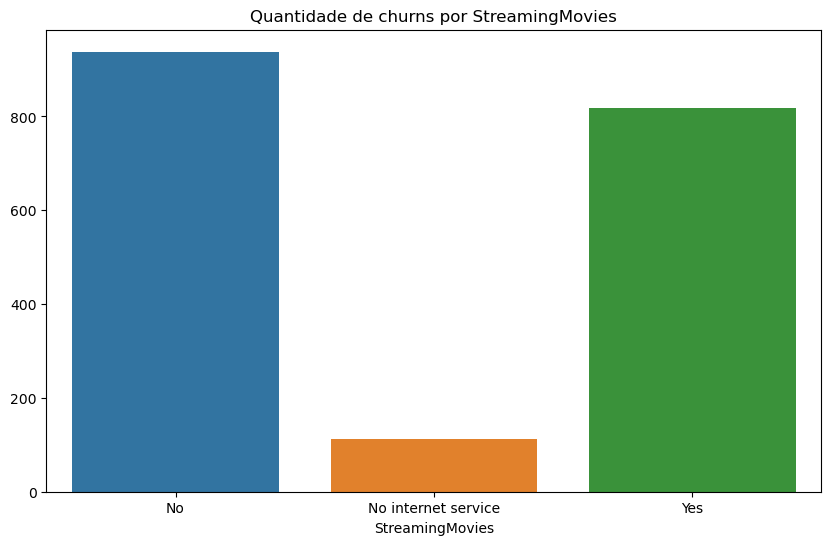

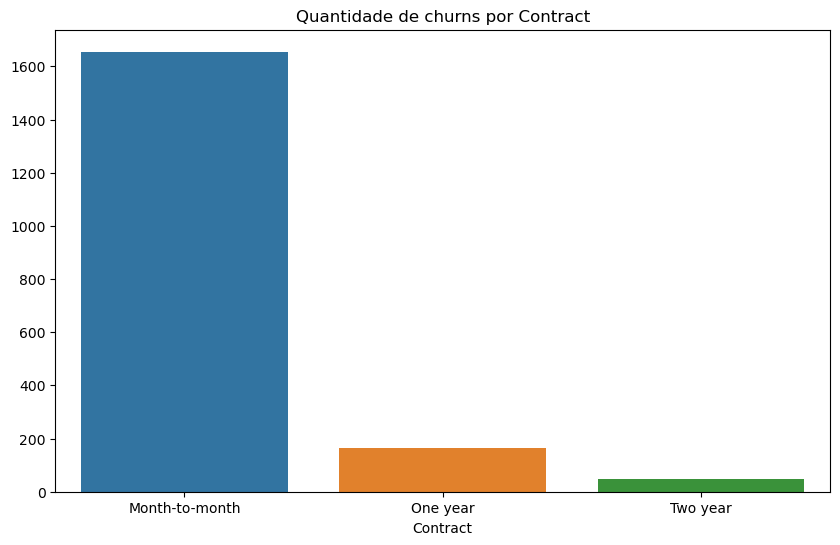

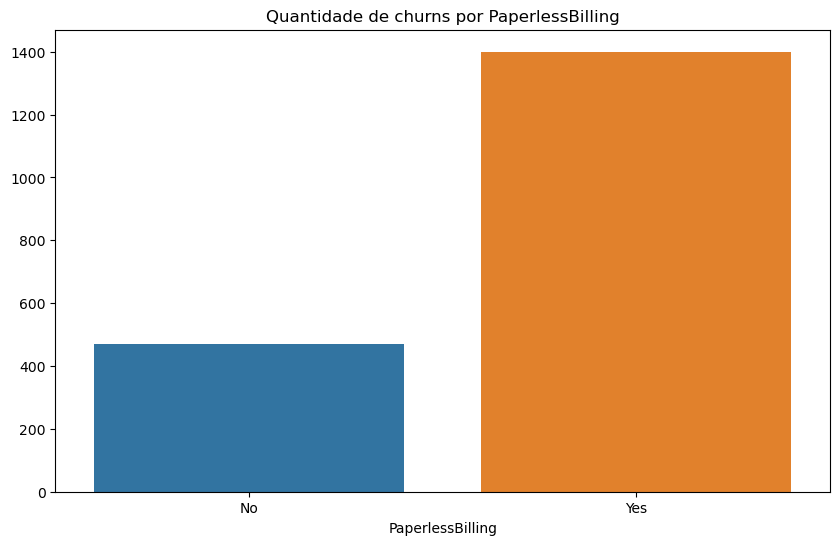

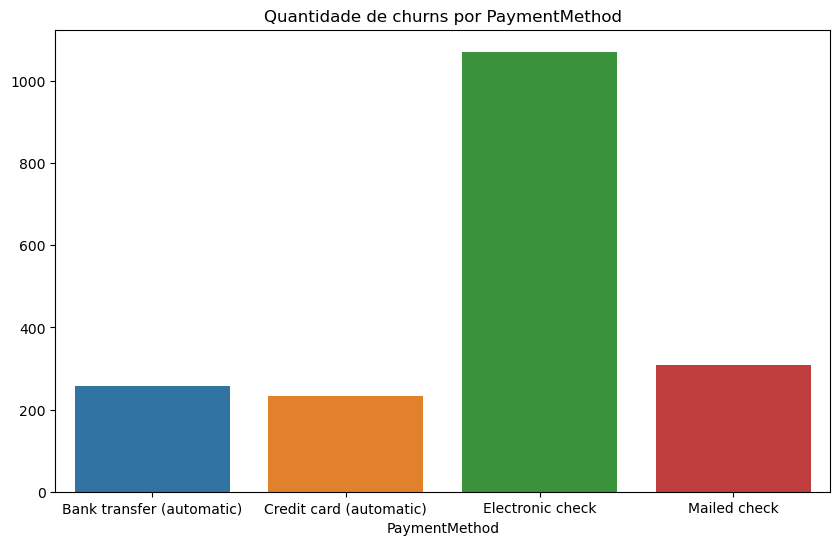

In [12]:
axs = [plot_categorical(df, i, label) for i in discrete_variables]

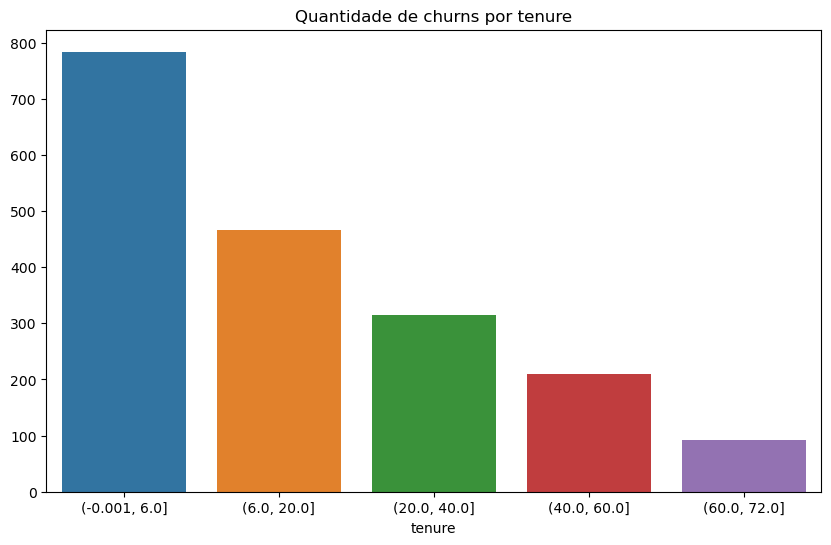

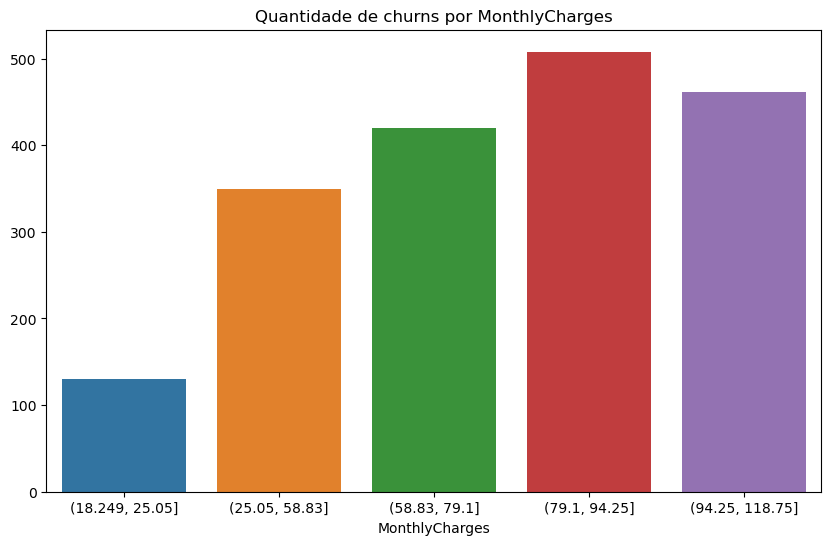

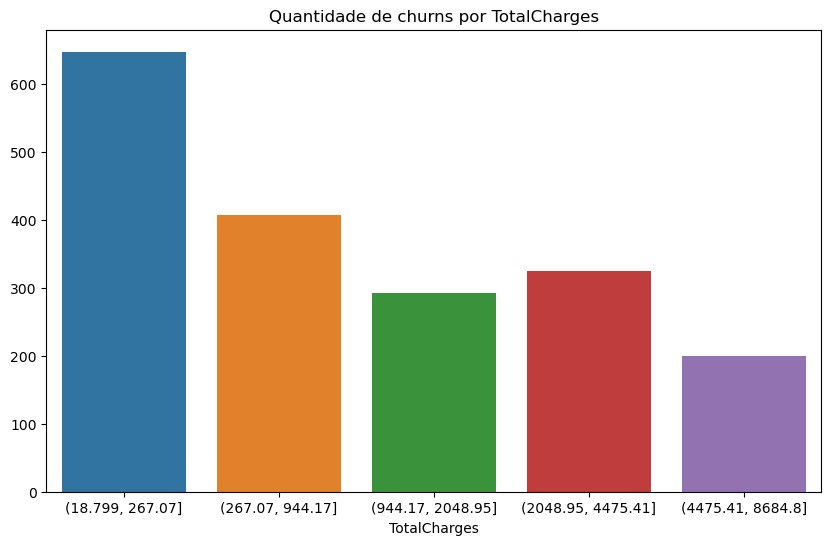

In [13]:
axs = [plot_continuous(df, i, label) for i in continuous_variables if i != label]

# <center> Modelagem </center>

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler


df_ml = df.copy()
df_ml[discrete_variables] = df_ml[discrete_variables].astype('category')

X, y = df_ml.drop(columns = [label]), df_ml[label]


ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Criar o objeto do classificador XGBoost
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           enable_categorical = True,
                          tree_method='hist')

# Treinar o modelo
xg_clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = xg_clf.predict(X_test)
y_pred_train = xg_clf.predict(X)

# Calcular o F1 Score
f1_train = f1_score(y, y_pred_train, average='weighted')
print("F1 Score (train):", f1_train)
f1_test = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (test):", f1_test)


F1 Score (train): 0.9071150489612199
F1 Score (test): 0.8516610778747349


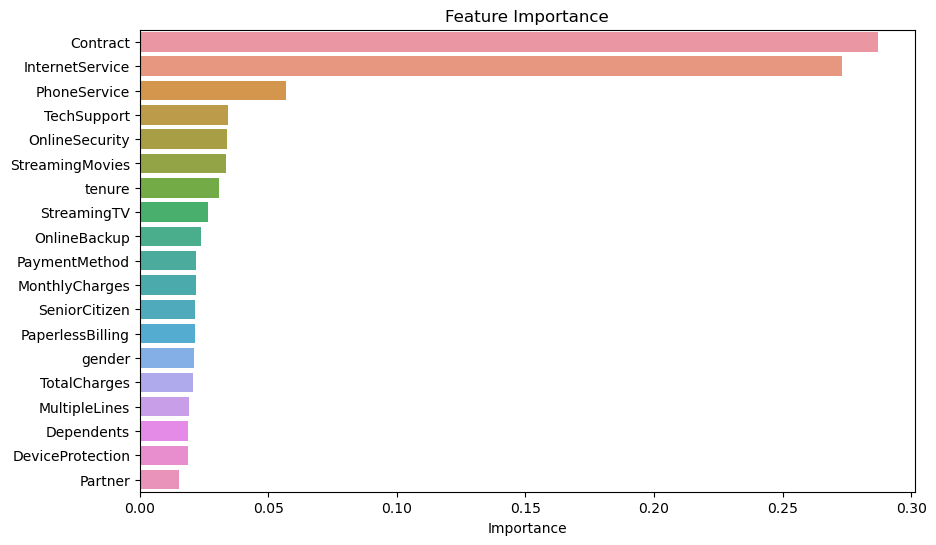

In [15]:
df_imp = pd.DataFrame({'Feature': X_train.columns,
                      'Importance': xg_clf.feature_importances_})

df_imp = df_imp.sort_values(by = 'Importance', ascending = False)

# Cria um gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data = df_imp, y = 'Feature', x = 'Importance')
plt.xlabel('Importance')
plt.ylabel('')
plt.title('Feature Importance')
plt.show()



# <center> Explorando Features Mais Importantes </center>

## Contract

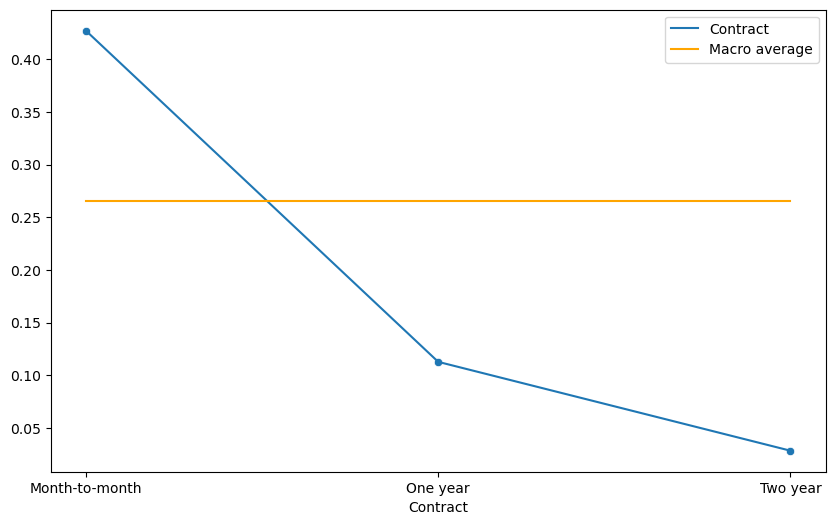

In [22]:
feature = 'Contract'

df_group = df.groupby(feature)[label].mean().reset_index()

macro_mean = df.drop(columns = feature)[label].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data = df_group, x = feature, y = label, label = 'Contract')
sns.scatterplot(data = df_group, x = feature, y = label)
sns.lineplot(data = df_group, x = feature, y = macro_mean, color = 'orange', label = 'Macro average')
plt.ylabel("")
plt.title("")
plt.show()

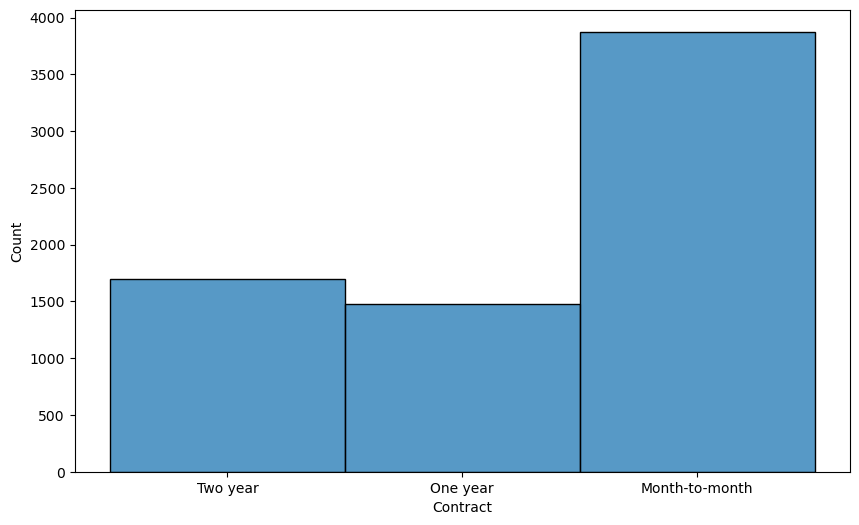

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature])
plt.show()

### Simulando 

In [24]:
df_feature_balance = balance_dataset(df, feature)
df_feature_balance[feature].value_counts()

Contract
Month-to-month    3875
Two year          3875
One year          3875
Name: count, dtype: int64

In [25]:
print("Média de churn por pessoa (dados originais)", df[label].mean().round(4))
print("Média de churn por pessoa (números de contratos iguais)", df_feature_balance[label].mean().round(4))
result = round(df_feature_balance[label].mean() / df[label].mean() - 1, 4) * 100
print(f"Uma redução de {result}%")

Média de churn por pessoa (dados originais) 0.2654
Média de churn por pessoa (números de contratos iguais) 0.1892
Uma redução de -28.720000000000002%
